**Instruction** 
- Read fandango_scores.csv into a Dataframe named reviews.
- Select the following columns and assign the resulting Dataframe to norm_reviews:
    - FILM
    - RT_user_norm
    - Metacritic_user_nom (note the misspelling of norm)
    - IMDB_norm
    - Fandango_Ratingvalue
    - Fandango_Stars
- Display the first row in norm_reviews


In [1]:
import pandas as pd
fandango = pd.read_csv("fandango_score_comparison.csv", encoding="Latin-1")
read = ["FILM", "RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue", "Fandango_Stars"]
norm_reviews = fandango[read]
norm_reviews.head(1)

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.9,4.5,5.0


In [2]:
norm_reviews.dtypes

FILM                     object
RT_user_norm            float64
Metacritic_user_nom     float64
IMDB_norm               float64
Fandango_Ratingvalue    float64
Fandango_Stars          float64
dtype: object

## Bar Plot

These sites use different scales for ratings. Some use a 5 star scale while others use a 100 point scale. In addition, Metacritic and Rotten Tomatoes aggregate scores from both users and film critics, while IMDB and Fandango aggregate only from their users. We'll focus on just the average scores from users, because not all of the sites have scores from critics.

The <code><font color="red">RT_user_norm</font></code>, <code><font color="red">Metacritic_user_nom</font></code>, <code><font color="red">IMDB_norm</font></code>, and Fandango_Ratingvalue columns contain the average user rating for each movie, normalized to a 0 to 5 point scale. This allows us to compare how the users on each site rated a movie. While using averages isn't perfect because films with a few reviews can skew the average rating, FiveThirtyEight only selected movies with a non-trivial number of ratings to ensure films with only a handful of reviews aren't included.

If you look at the first row, which lists the average user ratings for **Avengers: Age of Ultron (2015)**, you'll notice that the Fandango ratings, both the actual and the displayed rating, are higher than those from the other sites for a given movie. While calculating and comparing summary statistics give us hard numbers for quantifying the bias, visualizing the data using plots can help us gain a more intuitive understanding. We need a visualization that scales graphical objects to the quantitative values we're interested in comparing. One of these visualizations is a **bar plot**.

<img src="vertical_bar_plot.png"/>

In the bar plot above, the x-axis represented the different ratings and the y-axis represented the actual ratings. An effective bar plot uses categorical values on one axis and numerical values on the other axis. Because bar plots can help us find the category corresponding to the smallest or largest values, it's important that we restrict the number of bars in a single plot. Using a bar plot to visualize hundreds of values makes it difficult to trace the category with the smallest or largest value.

If the x-axis contains the categorical values and the rectangular bars are scaled vertically, this is known as a vertical bar plot. A horizontal bar plot flips the axes, which is useful for quickly spotting the largest value.

<img src="horizontal_bar_plot.png"/>	

An effective bar plot uses a consistent width for each bar. This helps keep the visual focus on the heights of the bars when comparing. Let's now learn how to create a vertical bar plot in matplotlib that represents the different user scores for **Avengers: Age of Ultron (2015)**.

## Creating Bars

When we generated line charts, we passed in the data to <code><font color="red">pyplot.plot()</font></code> and matplotlib took care of the rest. Because the markers and lines in a line chart correspond directly with x-axis and y-axis coordinates, all matplotlib needed was the data we wanted plotted. To create a useful bar plot, however, we need to specify the positions of the bars, the widths of the bars, and the positions of the axis labels. Here's a diagram that shows the various values we need to specify:
<img src="matplotlib_barplot_positioning.png"/>

We'll focus on positioning the bars on the x-axis in this step and on positioning the x-axis labels in the next step. We can generate a vertical bar plot using either [pyplot.bar()](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) or [Axes.bar()](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.bar). We'll use <code><font color="red">Axes.bar()</font></code> so we can extensively customize the bar plot more easily. We can use [pyplot.subplots()](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) to first generate a single subplot and return both the Figure and Axes object. This is a shortcut from the technique we used in the previous mission:
<code><font color="blue">
    fig, ax = plt.subplots()
</font></code>

The <code><font color="red">Axes.bar()</font></code> method has 2 required parameters, <code><font color="red">left</font></code> and <code><font color="red">height</font></code>. We use the <code><font color="red">left</font></code> parameter to specify the x coordinates of the left sides of the bar (marked in blue on the above image). We use the <code><font color="red">height</font></code> parameter to specify the height of each bar. Both of these parameters accept a list-like object.

The [np.arange()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) function returns evenly spaced values. We use <code><font color="red">arange()</font></code> to generate the positions of the <code><font color="red">left</font></code> side of our bars. This function requires a paramater that specifies the number of values we want to generate. We'll also want to add space between our bars for better readability:

```python
# Positions of the left sides of the 5 bars. [0.75, 1.75, 2.75, 3.75, 4.75]
from numpy import arange
import matplotlib.pyplot as plt 

bar_positions = arange(5) + 0.75

# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values

ax.bar(bar_positions, bar_heights)

```

We can also use the <code><font color="red">width</font></code>  parameter to specify the width of each bar. This is an optional parameter and the width of each bar is set to <code><font color="red">0.8</font></code>  by default. The following code sets the <code><font color="red">width</font></code>  parameter to <code><font color="red">1.5</font></code> :
<code><font color="blue">
    ax.bar(bar_positions, bar_heights, 1.5)
</font></code>

**Instructions**
- Create a single subplot and assign the returned Figure object to <code><font color="red">fig</font></code> and the returned Axes object to <code><font color="red">ax</font></code>.
- Generate a bar plot with:
    - <code><font color="red">left</font></code> set to <code><font color="red">bar_positions</font></code>
    - <code><font color="red">height</font></code> set to <code><font color="red">bar_heights</font></code>
    - <code><font color="red">width</font></code> set to <code><font color="red">0.5</font></code>
- Use <code><font color="red">plt.show()</font></code> to display the bar plot

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange

# Load Data
fandango = pd.read_csv("fandango_score_comparison.csv", encoding="Latin-1")
read = ["FILM", "RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue", "Fandango_Stars"]
norm_reviews = fandango[read]

num_cols = ["RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue", "Fandango_Stars"]

# Takes height from first row values 
bar_heights = norm_reviews[num_cols].iloc[0].values

# Position of left side bars [0.75, 1.75, 2.75, 3.75, 4.75] 
bar_positions = arange(5) + 0.75 
width = 0.5 

fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, width)
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
norm_reviews[num_cols].iloc[0]

RT_user_norm            4.30
Metacritic_user_nom     3.55
IMDB_norm               3.90
Fandango_Ratingvalue    4.50
Fandango_Stars          5.00
Name: 0, dtype: float64

**Instructions**
- Create a single subplot and assign the returned Figure object to <code><font color="red">fig</font></code> and the returned Axes object to <code><font color="red">ax</font></code>.
- Generate a bar plot with:
    - <code><font color="red">left</font></code> set to <code><font color="red">bar_positions</font></code>
    - <code><font color="red">height</font></code> set to <code><font color="red">bar_heights</font></code>
    - <code><font color="red">width</font></code> set to <code><font color="red">0.5</font></code>
- Set the x-axis tick positions to <code><font color="red">tick_positions</font></code>.
- Set the x-axis tick labels to <code><font color="red">num_cols</font></code> and rotate by <code><font color="red">90</font></code> degrees.
- Set the x-axis label to <code><font color="red">"Rating Source"</font></code>.
- Set the y-axis label to <code><font color="red">"Average Rating"</font></code>.
- Set the plot title to <code><font color="red">"Average User Rating For Avengers: Age of Ultron (2015)"</font></code>.
- Use <code><font color="red">plt.show()</font></code> to display the bar plot


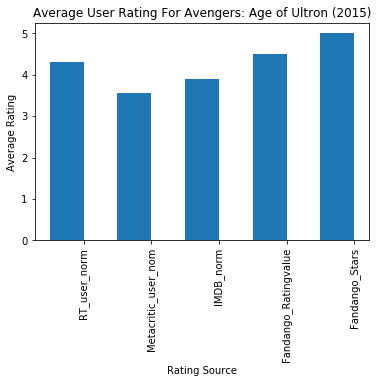

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange

# Load Data
fandango = pd.read_csv("fandango_score_comparison.csv", encoding="Latin-1")
read = ["FILM", "RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue", "Fandango_Stars"]
norm_reviews = fandango[read]

num_cols = ["RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue", "Fandango_Stars"]

# Takes height from first row values 
bar_heights = norm_reviews[num_cols].iloc[0].values

# Position of left side bars [0.75, 1.75, 2.75, 3.75, 4.75] 
bar_positions = arange(5) + 0.75 
width = 0.5 

tick_positions = range(1,6)

fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, width)
ax.set_xticklabels(labels=num_cols, rotation=90)
ax.set_xticks(ticks=tick_positions)

plt.title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.xlabel("Rating Source")
plt.ylabel("Average Rating")


plt.show()

## Horizontal Bar Plot
We can create a horizontal bar plot in matplotlib in a similar fashion. Instead of using <code><font color="red">Axes.bar()</font></code>, we use [Axes.barh()](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.barh). This method has 2 required parameters, <code><font color="red">bottom</font></code> and <code><font color="red">width</font></code>. We use the bottom parameter to specify the y coordinate for the <code><font color="red">bottom</font></code> sides for the bars and the <code><font color="red">width</font></code> parameter to specify the lengths of the bars:
<code><font color="blue">
    bar_widths = norm_reviews[num_cols].iloc[0].values
    bar_positions = arange(5) + 0.75
    ax.barh(bar_positions, bar_widths, 0.5)    
</font></code>

To recreate the bar plot from the last step as horizontal bar plot, we essentially need to map the properties we set for the y-axis instead of the x-axis. We use <code><font color="red">Axes.set_yticks()</font></code> to set the y-axis tick positions to <code><font color="red">[1, 2, 3, 4, 5]</font></code> and <code><font color="red">Axes.set_yticklabels()</font></code> to set the tick labels to the column names:
<code><font color="blue">
    tick_positions = range(1,6)
    num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
    ax.set_yticks(tick_positions)
    ax.set_yticklabels(num_cols) 
</font></code>


Create a single subplot and assign the returned Figure object to <code><font color="red">fig</font></code> and the returned Axes object to <code><font color="red">ax</font></code>.
- Generate a bar plot with:
    - <code><font color="red">bottom</font></code> set to <code><font color="red">bar_positions</font></code>
    - <code><font color="red">width</font></code> set to <code><font color="red">bar_widths</font></code>
    - <code><font color="red">height</font></code> set to <code><font color="red">0.5</font></code>
- Set the y-axis tick positions to <code><font color="red">tick_positions</font></code>.
- Set the y-axis tick labels to <code><font color="red">num_cols</font></code>.
- Set the y-axis label to <code><font color="red">"Rating Source"</font></code>.
- Set the x-axis label to <code><font color="red">"Average Rating"</font></code>.
- Set the plot title to <code><font color="red">"Average User Rating For Avengers: Age of Ultron (2015)"</font></code>.
- Use <code><font color="red">plt.show()</font></code> to display the bar plot.


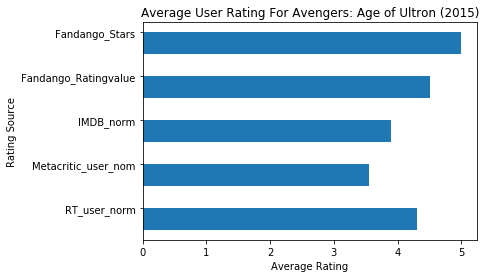

In [6]:
import matplotlib.pyplot as plt
from numpy import arange

num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_widths = norm_reviews[num_cols].iloc[0].values
bar_position = arange(5) + 0.75
tick_position = range(1,6)

fig, ax = plt.subplots()
ax.barh(y=bar_positions, width=bar_widths, height=0.5, align="center")
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel("Rating Source")
ax.set_xlabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.show()

## Scatter Plot

From the horizontal bar plot, we can more easily determine that the 2 average scores from Fandango users are higher than those from the other sites. While bar plots help us visualize a few data points to quickly compare them, they aren't good at helping us visualize many data points. Let's look at a plot that can help us visualize many points.

In the previous mission, the line charts we generated always connected points from left to right. This helped us show the trend, up or down, between each point as we scanned visually from left to right. Instead, we can avoid using lines to connect markers and just use the underlying markers. A plot containing just the markers is known as a **scatter plot**.

<img src="scatter_plot_intro.png"/>

A scatter plot helps us determine if 2 columns are weakly or strongly correlated. While calculating the [correlation coefficient](https://en.wikipedia.org/wiki/Correlation_coefficient) will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.

To generate a scatter plot, we use [Axes.scatter()](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.scatter). The <code><font color="red">scatter()</font></code> method has 2 required parameters, <code><font color="red">x</font></code> and <code><font color="red">y</font></code>, which matches the parameters of the <code><font color="red">plot()</font></code> method. The values for these parameters need to be iterable objects of matching lengths (lists, NumPy arrays, or pandas series).

Let's start by creating a scatter plot that visualizes the relationship between the <code><font color="red">Fandango_Ratingvalue</font></code> and <code><font color="red">RT_user_norm columns</font></code>. We're looking for at least a weak correlation between the columns.

**Instructions**
- Create a single subplot and assign the returned Figure object to <code><font color="red">fig</font></code> and the returned Axes object to <code><font color="red">ax</font></code>.
- Generate a scatter plot with the <code><font color="red">Fandango_Ratingvalue</font></code> column on the x-axis and the <code><font color="red">RT_user_norm column</font></code> on the y-axis.
- Set the x-axis label to <code><font color="red">"Fandango"</font></code> and the y-axis label to <code><font color="red">"Rotten Tomatoes"</font></code>.
- Use <code><font color="red"></font></code> to display the resulting plot.


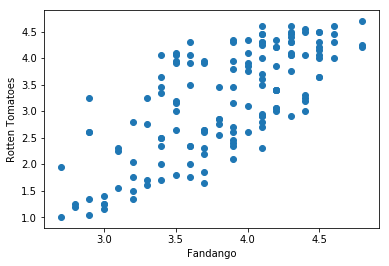

In [7]:
fig, ax = plt.subplots()
ax.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
ax.set_ylabel("Rotten Tomatoes")
ax.set_xlabel("Fandango")
plt.show()

## Switching axes
The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. The correlation is weak because for many x values, there are multiple corresponding y values. The correlation is positive because, in general, as x increases, y also increases.

When using scatter plots to understand how 2 variables are correlated, it's usually not important which one is on the x-axis and which one is on the y-axis. This is because the relationship is still captured either way, even if the plots look a little different. If you want to instead understand how an independent variable affects a dependent variables, you want to put the independent one on the x-axis and the dependent one on the y-axis. Doing so helps emphasize the potential cause and effect relation.

In our case, we're not exploring if the ratings from Fandango influence those on Rotten Tomatoes and we're instead looking to understand how much they agree. Let's see what happens when we flip the columns.
instructions

**Instruction**

- For the subplot associated with <code><font color="red">ax1</font></code>:
    - Generate a scatter plot with the <code><font color="red">Fandango_Ratingvalue</font></code> column on the x-axis and the <code><font color="red">RT_user_norm column</font></code> on the y-axis.
    - Set the x-axis label to <code><font color="red">"Fandango"</font></code> and the y-axis label to <code><font color="red">"Rotten Tomatoes"</font></code>.
- For the subplot associated with <code><font color="red">ax2</font></code>:
    - Generate a scatter plot with the <code><font color="red">RT_user_norm column</font></code> on the x-axis and the <code><font color="red">Fandango_Ratingvalue</font></code> column on the y-axis.
    - Set the x-axis label to <code><font color="red">"Rotten Tomatoes"</font></code> and the y-axis label to <code><font color="red">"Fandango"</font></code>.
- Use <code><font color="red">plt.show()</font></code> to display the resulting plot.


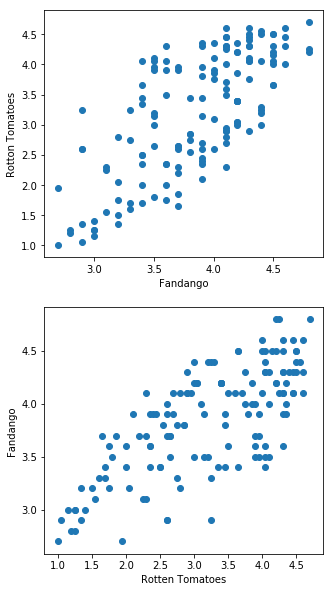

In [8]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotton Tomatoes")

ax2.scatter(norm_reviews["RT_user_norm"], norm_reviews["Fandango_Ratingvalue"])
ax2.set_xlabel("Rotten Tomatoes")
ax2.set_ylabel("Fandango")

plt.show()

## Bar Plots and Scatter Plots

The second scatter plot is a mirror reflection of the first scatter plot. The nature of the correlation is still reflected, however, which is the important thing. Let's now generate scatter plots to see how Fandango ratings correlate with all 3 of the other review sites.

When generating multiple scatter plots for the purpose of comparison, it's important that all plots share the same ranges in the x-axis and y-axis. In the 2 plots we generated in the last step, the ranges for both axes didn't match. We can use [Axes.set_xlim()](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xlim) and [Axes.set_ylim()](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_ylim) to set the data limits for both axes:
<code><font color="blue">
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
</font></code>

By default, matplotlib uses the minimal ranges for the data limits necessary to display all of the data we specify. By manually setting the data limits ranges to specific ranges for all plots, we're ensuring that we can accurately compare. We can even use the methods we just mentioned to zoom in on a part of the plots. For example, the following code will constrained the axes to the <code><font color="red">4</font></code> to <code><font color="red">5</font></code> range:
<code><font color="blue">
    ax.set_xlim(4, 5)
    ax.set_ylim(4, 5)
</font></code>


This makes small changes in the actual values in the data appear larger in the plot. A difference of <code><font color="red">0.1</font></code> in a plot that ranges from <code><font color="red">0</font></code>to <code><font color="red">5</font></code> is hard to visually observe. A difference of <code><font color="red">0.1</font></code>in a plot that only ranges from <code><font color="red">4</font></code> to <code><font color="red">5</font></code> is easily visible since the difference is 1/10th of the rang

**Instruction**

- For the subplot associated with <code><font color="red">ax1</font></code>:
    - Generate a scatter plot with the <code><font color="red">Fandango_Ratingvalue</font></code> column on the x-axis and the <code><font color="red">RT_user_norm</font></code> column on the y-axis.
    - Set the x-axis label to <code><font color="red">"Fandango"</font></code> and the y-axis label to <code><font color="red">"Rotten Tomatoes"</font></code>.
    - Set the x-axis and y-axis data limits to range from <code><font color="red">0</font></code>to <code><font color="red">5</font></code>
- For the subplot associated with <code><font color="red">ax2</font></code>:
    - Generate a scatter plot with the <code><font color="red">Fandango_Ratingvalue</font></code> column on the x-axis and the <code><font color="red">Metacritic_user_nom</font></code> column on the y-axis.
    - Set the x-axis label to <code><font color="red">"Fandango"</font></code> and the y-axis label to <code><font color="red">"Metacritic"</font></code>.
    - Set the x-axis and y-axis data limits to range from <code><font color="red">0</font></code>to <code><font color="red">5</font></code>
- For the subplot associated with <code><font color="red">ax3</font></code>:
    - Generate a scatter plot with the <code><font color="red">Fandango_Ratingvalue</font></code> column on the x-axis and the <code><font color="red">IMBD_norm</font></code> column on the y-axis.
    - Set the x-axis label to <code><font color="red">"Fandango"</font></code> and the y-axis label to <code><font color="red">"IMBD_norm"</font></code>.
    - Set the x-axis and y-axis data limits to range from <code><font color="red">0</font></code>to <code><font color="red">5</font></code>
- Use <code><font color="red">plt.show()</font></code> to display the resulting plot.

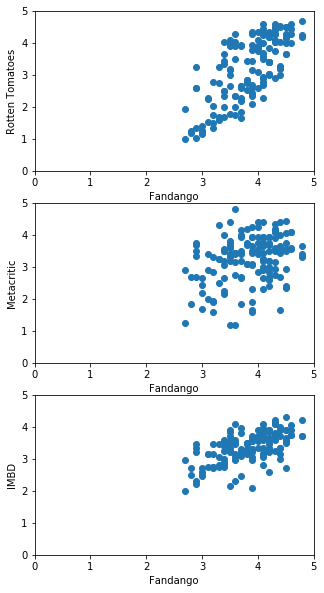

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)

ax2.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["Metacritic_user_nom"])
ax2.set_xlabel("Fandango")
ax2.set_ylabel("Metacritic")
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["IMDB_norm"])
ax3.set_xlabel("Fandango")
ax3.set_ylabel("IMBD")
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)

plt.show()

## Next steps
From the scatter plots, we can conclude that user ratings from IMDB and Fandango are the most similar. In addition, user ratings from Metacritic and Rotten Tomatoes have positive but weak correlations with user ratings from Fandango. We can also notice that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

The scatter plots unfortunately only give us a cursory understanding of the distributions of user ratings from each review site. For example, if a hundred movies had the same average user rating from IMDB and Fandango in the dataset, we would only see a single marker in the scatter plot. In the next mission, we'll learn about two types of plots that help us understand distributions of values.